# M77 Coursework: 3D "Pac-Man"
The following coursework is designed to test multiple components of the module sylabus; including 3D geometry, object detection, feature extraction and image manipulation.

Your task is to complete the below skeleton code to play a Pac-Man-esque game in 3D. You are allowed to utilise method discussed in the course, including feature extractors and deep learning approaches.

The aim of the coursework is to step through a 3D pointcloud of the old PhD lab at Swansea University. Several large spheres have been placed within the space, it is your job to move through the pointcloud in an automated fashion, detecting the location of the sphere and moving to the predicted 3D location. If you land close enough to a sphere it will be captured and removed from the pointcloud. 

You will need to decide what kinds of feature you want to use, extract these features and train a classifier to detect the spheres within an image. You can then use the functionality provided in the PacMan_functionality.py module to obtain the XYZ coordinates of the pixel you predict to be a sphere.


## Imports
Hre we will do our usual imports. I would recommend numpy, scipy, skimage, matplotlib and sklearn. If you wish to utilise the pointcloud processing toolkit you can do that as described in the handout. We will want to import our PacMan_functionality module as well.

In [1]:
import PacMan_functionality as PacMan
import numpy as np
import matplotlib.pyplot as plt
import pptk

# For operating-system tools and file-finding
import os
import glob

# For resizing images
import skimage
import skimage.transform

from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from os import listdir
from matplotlib import image
import cv2

## Game setup.
This cell will initialise the game world and add all of our spheres to the world. Do not edit the code here.

In [6]:
# Call startup_scene() to load the initial game scene
global_cloud, spheres_collected = PacMan.startup_scene()

In [7]:
# View our pointcloud if we want
v = pptk.viewer(global_cloud['Positions'], global_cloud['Colors']/255) # Fast, requires pptk
PacMan.show_point_cloud(global_cloud) # Slow, requires matplotlib

## Load the training data: Positives and Negatives
In the handout zip file there is a directory which contains numerous patches extracted from sample images. These patches are labelled as either containing a sphere or not. You may wish to use these to train a classifier for sphere detection.

In [8]:
# Get the training samples for both positive and negative patches

# Placeholders for the information from disk
img = []
dep = []
infra = []

neg_img = []
neg_dep = []
neg_infra = []

# Negatives
negative_path_to_data = os.getcwd()  + "/TrainingImages/negatives" # Edit this if data is another directory
negative_data_files = glob.glob(negative_path_to_data + "/negativePatch_*.jpg") # Change this to collect from saved images.
negative_n_frames = np.max([int(elem[-6:-4]) for elem in negative_data_files]) + 1

# Positives
positive_path_to_data = os.getcwd()  + "/TrainingImages/positives" # Edit this if data is another directory
positive_data_files = glob.globpositive_(path_to_data + "/positivePatch_*.jpg") # Change this to collect from saved images.
positive_n_frames = np.max([int(elem[-6:-4]) for elem in positive_data_files]) + 1




'''
for i_frame in range(positive_n_frames):
    print("Getting frame: {0}".format(i_frame))
    img.append(np.load(positive_path_to_data + "/positivePatch_{0:02d}.jpg".format(i_frame)))
    dep.append(np.load(positive_path_to_data + "/positivePatch_{0:02d}.jpg".format(i_frame)))
    infra.append(np.load(positive_path_to_data + "/positivePatch_{0:02d}.jpg".format(i_frame)))

for i_frame in range(negative_n_frames):
    print("Getting frame: {0}".format(i_frame))
    neg_img.append(np.load(negative_path_to_data + "/negativePatch_{0:02d}.jpg".format(i_frame)))
    neg_dep.append(np.load(negative_path_to_data + "/negativePatch_{0:02d}.jpg".format(i_frame)))
    neg_infra.append(np.load(negative_path_to_data + "/negativePatch_{0:02d}.jpg".format(i_frame)))


print("Finished grabbing data from disk.")
'''
'''
IMGW = 1920
IMGpositive_H = 1080
DEPW = 512
DEPH = 424
    
INFRAW = DEPW
INFRAH = DEPH

img = [np.reshape(elem,(IMGH, IMGWpositivePatch_m in img]
dep = [np.reshape(elem,(DEPH, DEPW)) for elem in dep]
infra =positivePatch_lem,(INFRAH, INFRAW)) for elem in infra]

img = [np.reshape(elem,(IMGH, IpositivePatch_n img]
dep = [np.reshape(elem,(DEPH, DE aPW)) for elem in dep]
infra = [np.reshape(elem,(INFRAH, INFRAW)) for elem in infra]
'''

# Concatenate the patches into a 4D numpy array (S*H*W*C.jpgnd create a label vector (S).jpg.jpg

ValueError: invalid literal for int() with base 10: '_8'

In [4]:
from os import listdir
from matplotlib import image

# load all images in a directory
neg_loaded_images = list()
for filename in listdir('TrainingImages/negatives'):
	# load image
	img_data = image.imread('TrainingImages/negatives/' + filename)
	# store loaded image
	neg_loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

pos_loaded_images = list()
for filename in listdir('TrainingImages/positives'):
	# load image
	img_data = image.imread('TrainingImages/positives/' + filename)
	# store loaded image
	pos_loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))




total_images = np.array

g (51, 51, 3)
> loaded negativePatch_514.jpg (51, 51, 3)
> loaded negativePatch_1030.jpg (51, 51, 3)
> loaded negativePatch_1756.jpg (51, 51, 3)
> loaded negativePatch_272.jpg (51, 51, 3)
> loaded negativePatch_266.jpg (51, 51, 3)
> loaded negativePatch_1742.jpg (51, 51, 3)
> loaded negativePatch_1024.jpg (51, 51, 3)
> loaded negativePatch_500.jpg (51, 51, 3)
> loaded negativePatch_2505.jpg (51, 51, 3)
> loaded negativePatch_528.jpg (51, 51, 3)
> loaded negativePatch_2263.jpg (51, 51, 3)
> loaded negativePatch_2277.jpg (51, 51, 3)
> loaded negativePatch_2511.jpg (51, 51, 3)
> loaded negativePatch_1018.jpg (51, 51, 3)
> loaded negativePatch_1795.jpg (51, 51, 3)
> loaded negativePatch_1959.jpg (51, 51, 3)
> loaded negativePatch_1781.jpg (51, 51, 3)
> loaded negativePatch_2288.jpg (51, 51, 3)
> loaded negativePatch_1971.jpg (51, 51, 3)
> loaded negativePatch_299.jpg (51, 51, 3)
> loaded negativePatch_1965.jpg (51, 51, 3)
> loaded negativePatch_1554.jpg (51, 51, 3)
> loaded negativePatch_1

In [2]:
# https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from os import listdir
from matplotlib import image


# load the image
'''image = Image.open('opera_house.jpg')
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)
'''
pos_loaded_images = list()
neg_loaded_images = list()

all_images = list()
labels = list()

CATEGORIES = ["negatives", "positives"]

for category in CATEGORIES:  # do dogs and cats
    #path = os.path.join(DATADIR,category)  # create path to dogs and cats
    class_num = CATEGORIES.index(category)
	count = 0
	for filename in listdir('TrainingImages/positives'):
		# load image
		img_data = image.imread('TrainingImages/positives/' + filename)
		if count < 11:
			plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
			plt.show()  # display!
			print(img_array.shape)
			count += 1

		all_images.append(img_data)
		labels.append(class_num)
		#print('> loaded %s %s' % (filename, img_data.shape))

all_data = asarray(all_images)

'''
for filename in listdir('TrainingImages/'+):
	# load image
	img_data = image.imread('TrainingImages/positives/' + filename)
	# store loaded image
	pos_loaded_images.append(img_data)
	all_images.append(img_data)
	#print('> loaded %s %s' % (filename, img_data.shape))
pos_data = asarray(pos_loaded_images)

for filename in listdir('TrainingImages/negatives'):
	# load image
	img_data = image.imread('TrainingImages/negatives/' + filename)
	# store loaded image
	neg_loaded_images.append(img_data)
	all_images.append(img_data)
	#print('> loaded %s %s' % (filename, img_data.shape))





neg_data = asarray(neg_loaded_images)

all_data = asarray(all_images)

print(neg_data.shape)
print(pos_data.shape)
print(all_data.shape)

#pyplot.imshow(pos_data[2,:,:,])
#pyplot.show()
#pyplot.imshow(neg_data[2,:,:,])
#pyplot.show()'''

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-2-45f3b8f8c7d3>, line 33)

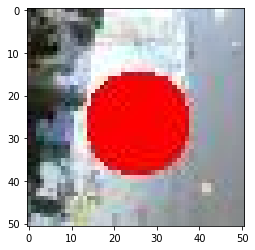

(51, 51, 3)


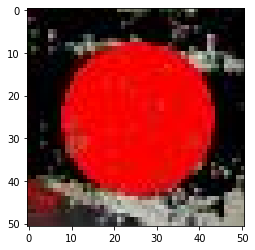

(51, 51, 3)


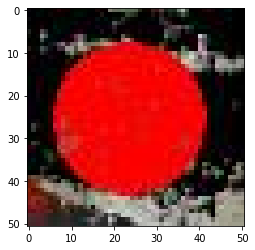

(51, 51, 3)


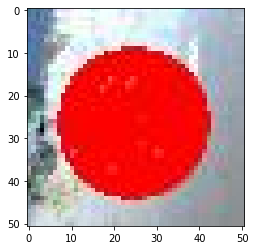

(51, 51, 3)


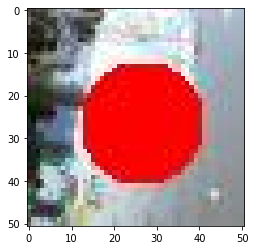

(51, 51, 3)


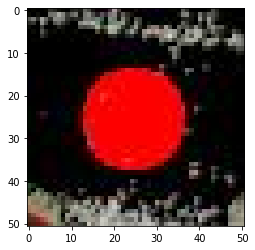

(51, 51, 3)


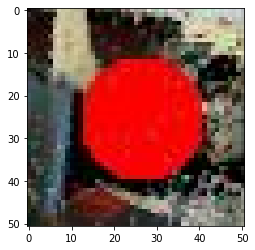

(51, 51, 3)


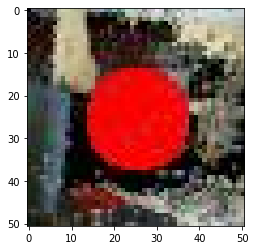

(51, 51, 3)


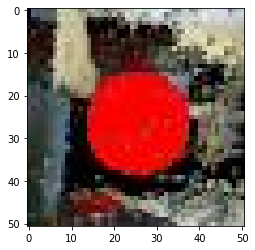

(51, 51, 3)


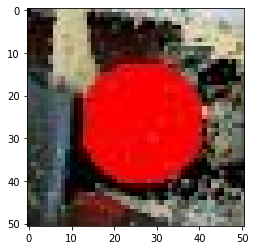

(51, 51, 3)


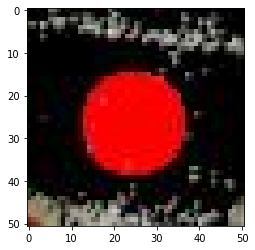

(51, 51, 3)


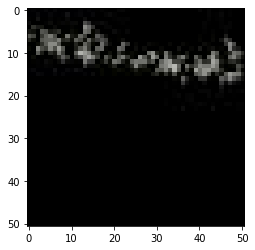

(51, 51, 3)


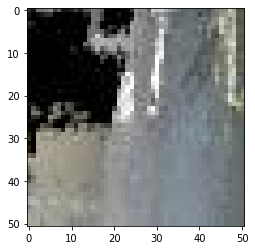

(51, 51, 3)


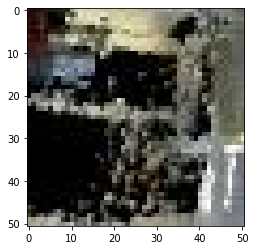

(51, 51, 3)


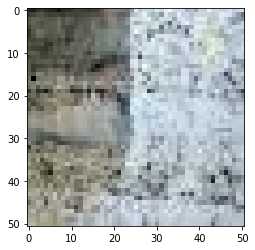

(51, 51, 3)


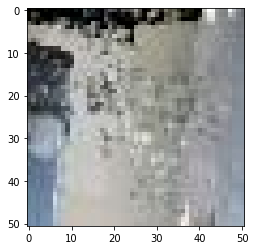

(51, 51, 3)


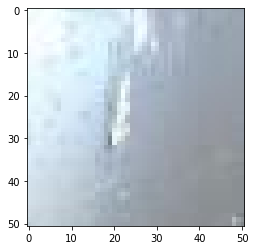

(51, 51, 3)


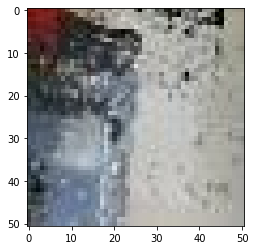

(51, 51, 3)


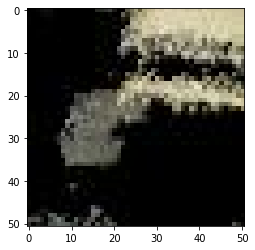

(51, 51, 3)


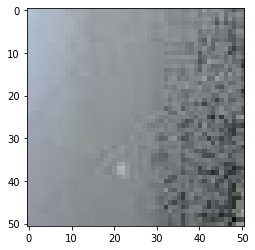

(51, 51, 3)


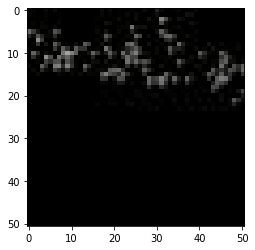

(51, 51, 3)


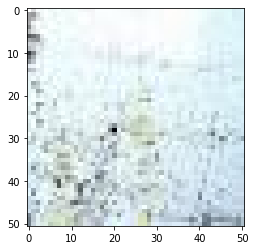

(51, 51, 3)
(2908, 51, 51, 3)
(2908,)


In [3]:
pos_loaded_images = list()
neg_loaded_images = list()
all_images = list()
labels = list()

count = 0
for filename in listdir('TrainingImages/positives'):
    img_data = cv2.imread('TrainingImages/positives/' + filename)
    if count < 11:
        plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
        plt.show()  # display!
        print(img_data.shape)
        count += 1

    all_images.append(img_data)
    labels.append(int(1))
    #print('> loaded %s %s' % (filename, img_data.shape))

count = 0
for filename in listdir('TrainingImages/negatives'):
    img_data = cv2.imread('TrainingImages/negatives/' + filename)
    if count < 11:
        plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
        plt.show()  # display!
        print(img_data.shape)
        count += 1

    all_images.append(img_data)
    labels.append(int(0))
    #print('> loaded %s %s' % (filename, img_data.shape))

all_data = asarray(all_images)
labels = asarray(labels)
print(all_data.shape)
print(labels.shape)

In [36]:
pos_labels = np.empty(shape=[len(pos_loaded_images),51,51,3])#np.ones((len(pos_loaded_images),1))

print(pos_labels.shape)
print(pos_data.shape)

print(pos_labels[0])

for each_value in (pos_data):
	full_pos_data = np.concatenate((pos_data, pos_labels), axis=1)



(308, 51, 51, 3)
(308, 51, 51, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [15]:
print(full_pos_data.shape)

pos_data[0,:,:,]

(2403632,)


array([[[ 44,  46,  45],
        [ 19,  21,  16],
        [ 87,  90,  83],
        ...,
        [173, 186, 203],
        [170, 183, 200],
        [165, 178, 195]],

       [[ 68,  70,  67],
        [ 40,  42,  37],
        [ 70,  73,  66],
        ...,
        [173, 186, 203],
        [169, 182, 199],
        [165, 178, 195]],

       [[ 61,  63,  60],
        [ 92,  94,  89],
        [ 74,  77,  70],
        ...,
        [171, 184, 200],
        [168, 181, 197],
        [164, 177, 193]],

       ...,

       [[ 70,  75,  79],
        [161, 167, 179],
        [186, 198, 214],
        ...,
        [134, 138, 139],
        [133, 137, 138],
        [132, 136, 137]],

       [[108, 113, 117],
        [170, 176, 188],
        [197, 209, 225],
        ...,
        [134, 138, 139],
        [133, 137, 138],
        [132, 136, 137]],

       [[157, 162, 166],
        [188, 194, 206],
        [189, 201, 217],
        ...,
        [134, 138, 139],
        [133, 137, 138],
        [132, 136, 137]]

In [ ]:
all_images = list()

for i in 

In [13]:
#concatinating Data
pos_data_copy = pos_data

label = np.array([0,0,0,0,0])
print("Normal data:" , pos_data[2,:,:,])

for each_number in pos_data_copy:
    z = np.concatenate((pos_data_copy, label.reshape(label)), axis=0)

'''
print("Concat data:", z[2,:,:,])

pyplot.imshow(pos_data_copy[2,:,:,])
pyplot.show()'''

'''
neg_copy = neg_data
labels = np.array([2600,0]
for each_image in (neg_copy):
    z = np.append(neg_copy, labels[i,:])

print(z[2:,:,:,:])'''

Normal data: [[[ 11   4  11]
  [  0   1   4]
  [  0   5   2]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  3   0   4]
  [  0   1   3]
  [  1  10   9]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 10  10  12]
  [  1   0   2]
  [  3   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 71  51  50]
  [ 76  44  47]
  [ 83  38  45]
  ...
  [136 135 117]
  [139 138 120]
  [145 144 126]]

 [[ 68  48  47]
  [ 73  41  44]
  [ 81  36  43]
  ...
  [147 146 128]
  [150 149 131]
  [153 152 134]]

 [[ 64  44  43]
  [ 70  38  41]
  [ 79  34  41]
  ...
  [158 157 139]
  [158 157 139]
  [159 158 140]]]


ValueError: cannot reshape array of size 5 into shape (0,0,0,0,0)

## Train a classifier on the samples, this may require feature extraction on the patches
Depending on your desired apporach you may want to extract features on the training patches you have been given. These can then be used to train our desired classifier to detect the patches based not on the raw data, but on a representative feature descriptor. Several are talked about both in the lectures and labs. 

In [ ]:
# Extract the features - maybe, might not be needed with representation learning approaches

In [ ]:
# Train a classification model to perform binary classification of the patch into whether it contains a sphere.



In [12]:
# DNN Imports

# For ndarray handling:
import numpy as np

# For plotting:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For deep learning functionality
import tensorflow as tf
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPool2D
from tensorflow.python.keras.layers import SimpleRNN, LSTM

In [ ]:
#CNN

# Normalize the data to help with training
X_train_CNN = np.expand_dims(X_train, axis=-1)
X_test_CNN = np.expand_dims(X_test, axis=-1)
X_train_CNN = X_train_CNN.astype('float32')
X_test_CNN = X_test_CNN.astype('float32')
X_train_CNN /= 255
X_test_CNN /= 255

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(Conv2D(10, (5, 5), input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2], 1)))
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the next hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(MaxPool2D())
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the dense head layer
model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))

# Create the output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_CNN, Y_train, epochs=10, validation_split=0.2)

## Initialise our starting point in the game and get our first view into the scene
We should start the game at a position of XYZ = [0, 0, 0] and a camera angle of [0, 0, 0]. These variables can be updated once we find a sphere, or rotated when we don't find a sphere. We can then get our first image projected to the camera plane to start our game. 

In [ ]:
# Initialise position and angle variable 
position = np.zeros([3])
angle = np.zeros([3])

In [ ]:
# Get the image, XYZ maps and depth map of the current viewpoint into the scene

## Perform our loop, in which we will perform pixel-wise prediction on binary class label and then perform the correct action based on detection of spheres.
This will be the main bulk of your implementation, utilising the feature descriptors and trained models from the above cells. In each loop of the program we will want to:
-  Get current view into the scene
-  Extract patches from the scene
-  Extract features on the patches
-  Use the pretrained model to obtain class prediction probabilities
-  Identify if a sphere has been found in the scene
  -  If so, find the mapped XYZ location, move there and update the scene
  -  If not, rotate the camera in a bid to find the sphere


In [ ]:
while not np.all(spheres_collected): # While there are spheres to find
    # Get current image from viewpoint
    
    # Extract patches from the scene
    
    # Extract features from the patches
    
    # Predict the probability of a pixel being a sphere, based on the patch
    
    # Use probabilities to find sphere coordinates in 3D
    
    # Update camera appropriately
    
    # Update scene if needed